In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# List of file paths for the CSV files you want to merge
file_paths = ["dim_date.csv","dim_hotels.csv","dim_rooms.csv","fact_aggregated_bookings.csv","fact_bookings.csv"]  # Add more file paths as needed

# List to store DataFrames loaded from each CSV file
data_frames = []

# Load each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    data_frames.append(pd.read_csv(file_path))

# Merge all DataFrames in the list into one DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_file_path = "merged_data.csv"  # Specify the path for the merged CSV file
merged_data.to_csv(merged_file_path, index=False)

print("Merged data saved to:", merged_file_path)


Merged data saved to: merged_data.csv


In [3]:
data = merged_data

In [4]:
data.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,room_id,room_class,...,capacity,booking_id,booking_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,01-May-22,May 22,W 19,weekend,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-May-22,May 22,W 19,weekeday,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-May-22,May 22,W 19,weekeday,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-May-22,May 22,W 19,weekeday,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-May-22,May 22,W 19,weekeday,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,room_id,room_class,...,capacity,booking_id,booking_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
143906,NaN,NaN,NaN,NaN,17564.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Jul312217564RT46,2022-07-29,2022-08-03,1.0,makeyourtrip,2.0,Checked Out,32300.0,32300.0
143907,NaN,NaN,NaN,NaN,17564.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Jul312217564RT47,2022-07-30,2022-08-01,4.0,logtrip,2.0,Checked Out,38760.0,38760.0
143908,NaN,NaN,NaN,NaN,17564.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Jul312217564RT48,2022-07-30,2022-08-02,1.0,tripster,NaN,Cancelled,32300.0,12920.0
143909,NaN,NaN,NaN,NaN,17564.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Jul312217564RT49,2022-07-29,2022-08-01,2.0,logtrip,2.0,Checked Out,32300.0,32300.0
143910,NaN,NaN,NaN,NaN,17564.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Jul312217564RT410,2022-07-31,2022-08-01,2.0,makeyourtrip,NaN,Cancelled,32300.0,12920.0


In [6]:
data.dtypes

date                    object
mmm yy                  object
week no                 object
day_type                object
property_id            float64
property_name           object
category                object
city                    object
room_id                 object
room_class              object
check_in_date           object
room_category           object
successful_bookings    float64
capacity               float64
booking_id              object
booking_date            object
checkout_date           object
no_guests              float64
booking_platform        object
ratings_given          float64
booking_status          object
revenue_generated      float64
revenue_realized       float64
dtype: object

In [7]:
data.shape

(143911, 23)

In [8]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 23)


In [9]:
data.count()

date                       92
mmm yy                     92
week no                    92
day_type                   92
property_id            143815
property_name              25
category                   25
city                       25
room_id                     4
room_class                  4
check_in_date          143790
room_category          143790
successful_bookings      9200
capacity                 9200
booking_id             134590
booking_date           134590
checkout_date          134590
no_guests              134590
booking_platform       134590
ratings_given           56683
booking_status         134590
revenue_generated      134590
revenue_realized       134590
dtype: int64

In [10]:
data = data.drop_duplicates()


In [11]:
data.isnull().sum()

date                   143819
mmm yy                 143819
week no                143819
day_type               143819
property_id                96
property_name          143886
category               143886
city                   143886
room_id                143907
room_class             143907
check_in_date             121
room_category             121
successful_bookings    134711
capacity               134711
booking_id               9321
booking_date             9321
checkout_date            9321
no_guests                9321
booking_platform         9321
ratings_given           87228
booking_status           9321
revenue_generated        9321
revenue_realized         9321
dtype: int64

In [12]:
data.describe()

,property_id,successful_bookings,capacity,no_guests,ratings_given,revenue_generated,revenue_realized
count,143815.000000,9200.000000,9200.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18059.800223,14.629348,25.280000,2.036808,3.619004,14916.013188,12696.123256
std,1093.498533,7.591770,11.440971,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,3.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,9.000000,18.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,14.000000,25.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,19.000000,34.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,43.000000,50.000000,6.000000,5.000000,45220.000000,45220.000000


<Axes: xlabel='capacity', ylabel='Count'>

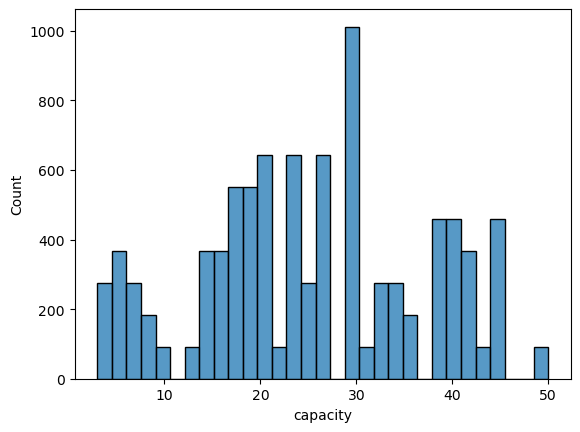

In [13]:
import seaborn as sns 
sns.histplot(data['capacity'])

<Axes: >

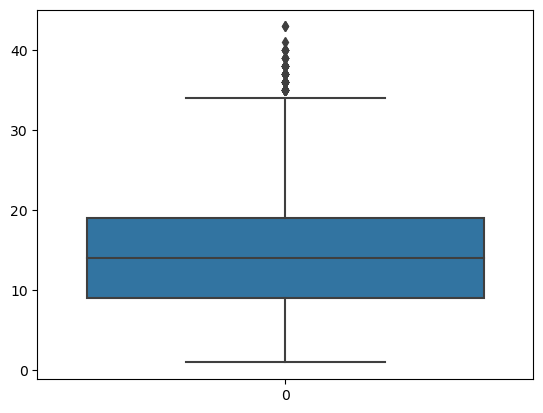

In [14]:
import seaborn as sns
sns.boxplot(data['successful_bookings'])

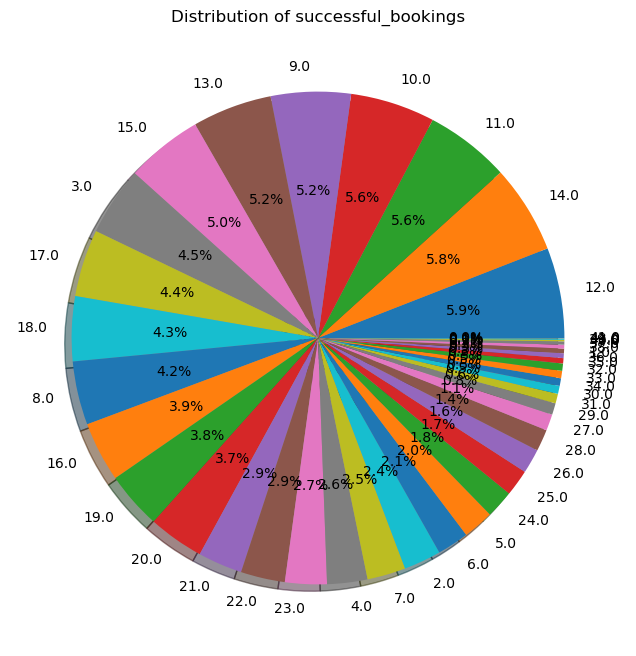

In [15]:
successful_bookin_counts = data['successful_bookings'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(successful_bookin_counts, labels=successful_bookin_counts.index, autopct='%1.1f%%',shadow = True)
plt.title('Distribution of successful_bookings')
plt.show()

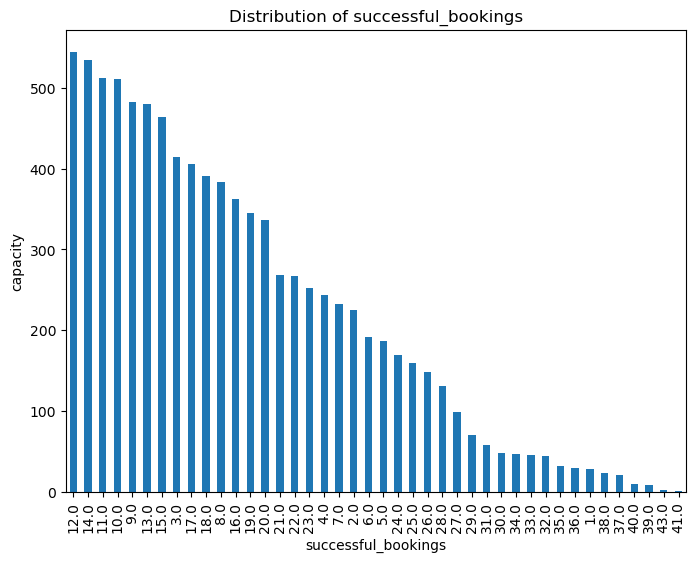

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
data['successful_bookings'].value_counts().plot(kind='bar')
plt.title('Distribution of successful_bookings')
plt.xlabel('successful_bookings')
plt.ylabel('capacity')
plt.show()


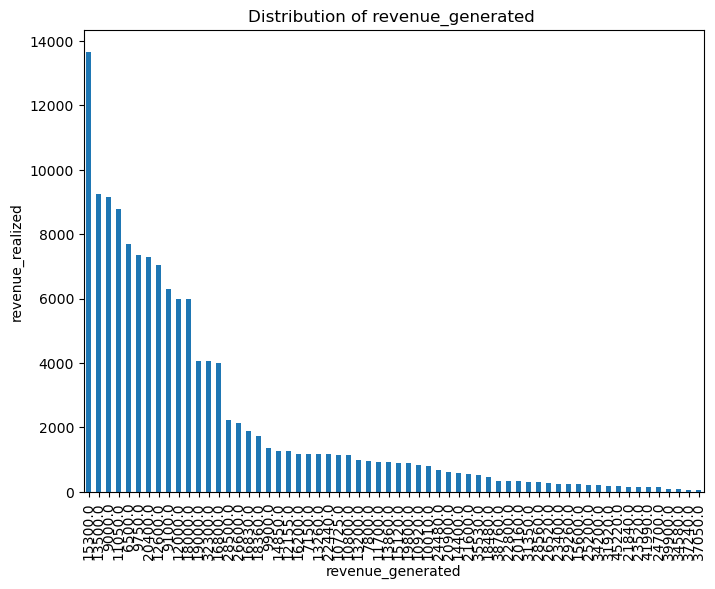

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
data['revenue_generated'].value_counts().plot(kind='bar')
plt.title('Distribution of revenue_generated ')
plt.xlabel('revenue_generated')
plt.ylabel('revenue_realized')
plt.show()


C:\Users\BAPS\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


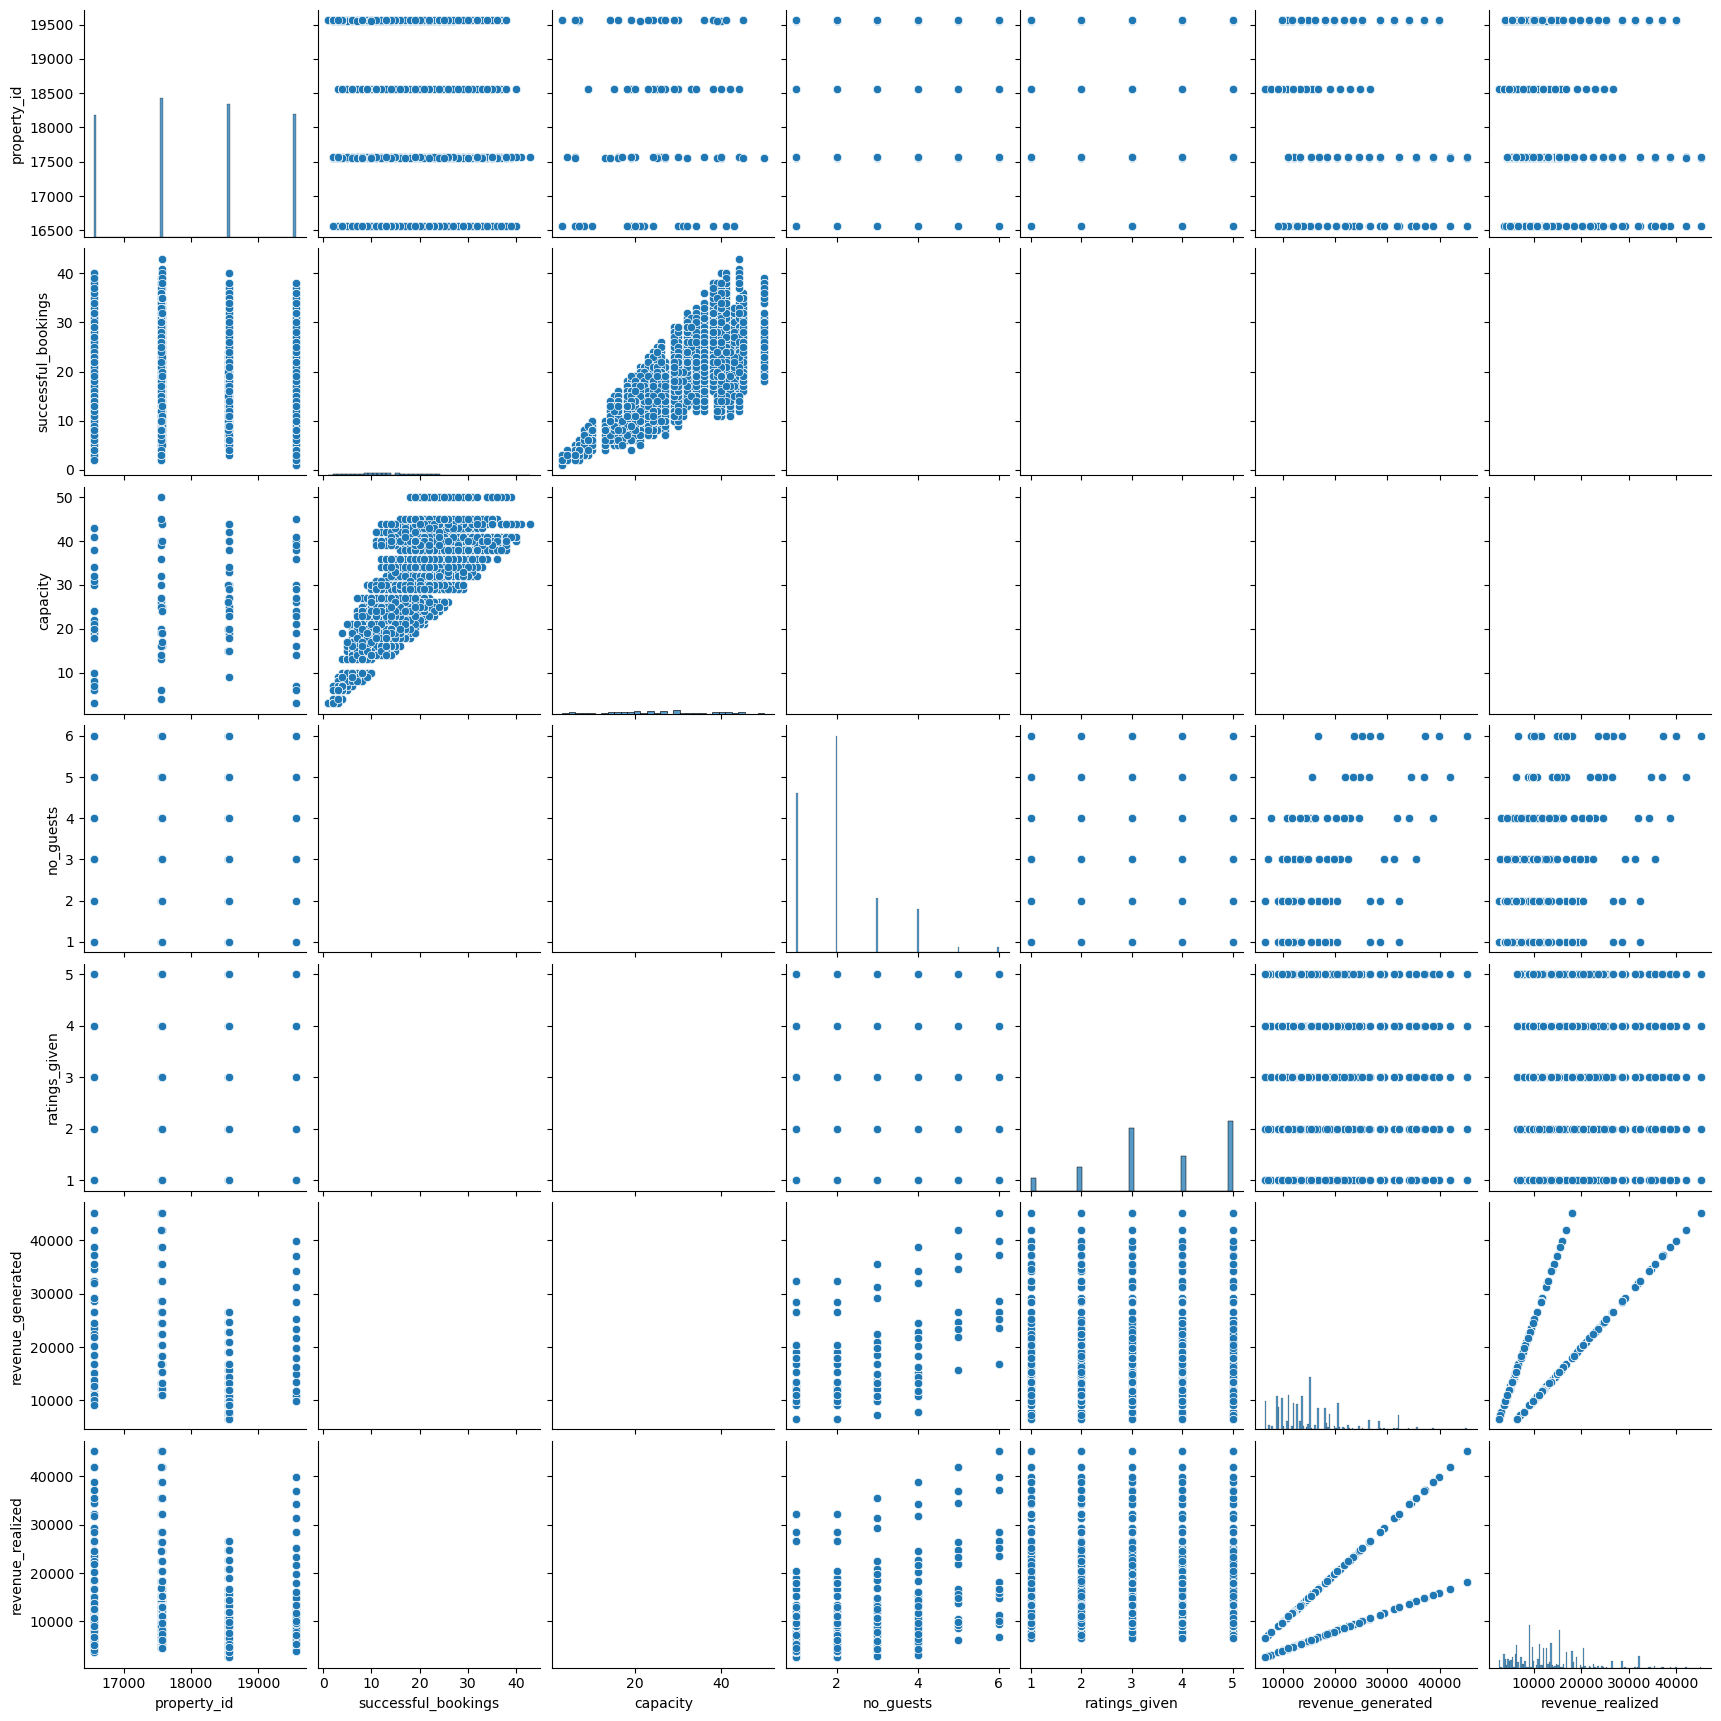

In [18]:
sns.pairplot(data)

Thank You